In [1]:
import qcportal as ptl
from openeye import oechem, oedepict
from openforcefield.topology import Molecule, Topology
from openforcefield.typing.engines.smirnoff import ForceField
import cmiles
from fragmenter import chemi
from IPython.display import Image


In [2]:
!conda list|grep fragmenter

fragmenter                0.0.4                      py_1    omnia


In [3]:
def show_oemol_struc(oemol):
    from IPython.display import Image
    from openeye import oedepict
    width = 500
    height = 300
    opts = oedepict.OE2DMolDisplayOptions(
                        width, height, oedepict.OEScale_AutoScale
                    )
    oedepict.OEPrepareDepiction(oemol)
    img = oedepict.OEImage(width, height)
    display = oedepict.OE2DMolDisplay(oemol, opts)
    oedepict.OERenderMolecule(img, display)
    png = oedepict.OEWriteImageToString("png", img)
    return Image(png)


# Rowley dataset wbo inspection
WBO: 1.6 with Fragmenter chemi.smiles_to_oemol() <br />


WBO: 1.00 with OFFTK <br />


cmiles: `[H:13][C:1]1=[C:2]([C:9](=[O:11])[N:10]([C:8](=[C:3]1[H:15])[C:7]2=[C:6]([O:12][C:5](=[C:4]2[H:16])[H:17])[H:18])[H:19])[H:14]` 


dihedral_indices: [3, 6, 7, 9] <br />
Torsion barrier (KJ/mol): 10.81 <br />
record id: 21272432 <br />

[H]C1=C(C(=O)N(C(=C1[H])C2=C(OC(=C2[H])[H])[H])[H])[H]
bond:  <Bond atom1 index='6', atom2 index='7'>
WBO:  1.0012589793507196


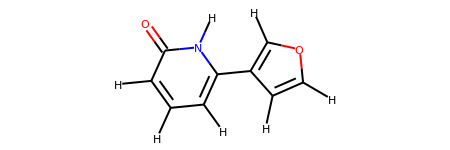

In [4]:
mapped_smiles = '[H:13][C:1]1=[C:2]([C:9](=[O:11])[N:10]([C:8](=[C:3]1[H:15])[C:7]2=[C:6]([O:12][C:5](=[C:4]2[H:16])[H:17])[H:18])[H:19])[H:14]'
dihedral_indices = [3, 6, 7, 9]
central = dihedral_indices[1:3]
offmol = Molecule.from_mapped_smiles(mapped_smiles)
offmol.assign_fractional_bond_orders()
bond = offmol.get_bond_between(6, 7)
print(offmol.to_smiles())
print("bond: ", bond)
print("WBO: ", bond.fractional_bond_order)
offmol.visualize()

bond:  15 (6C-7C)
WBO:  1.0012589793507196
 


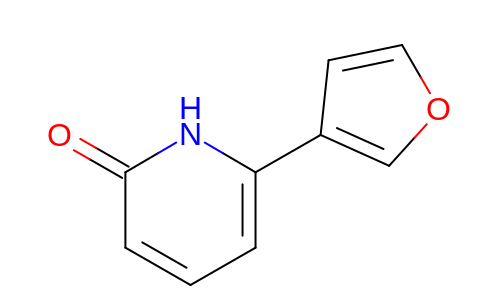

In [5]:
oemol_off = offmol.to_openeye()

for bond in oemol_off.GetBonds():
    m1 = bond.GetBgnIdx()
    m2 = bond.GetEndIdx()
    if m1 in central:
        if m2 in central:
            print("bond: ", bond)
            print("WBO: ", bond.GetData('fractional_bond_order'))
            print(" ")
show_oemol_struc(oemol_off)

## Calculated using fragmenter modules

In [39]:
oemol = chemi.smiles_to_oemol(mapped_smiles)
oemol = chemi.get_charges(oemol)

for bond in oemol.GetBonds():
    m1 = bond.GetBgnIdx()
    m2 = bond.GetEndIdx()
    if m1 in central:
        if m2 in central:
            print("bond: ", bond)
            print("WBO: ", bond.GetData('WibergBondOrder'))
            print(" ")

bond:   9 (6C-7C)
WBO:  1.5895380973815918
 


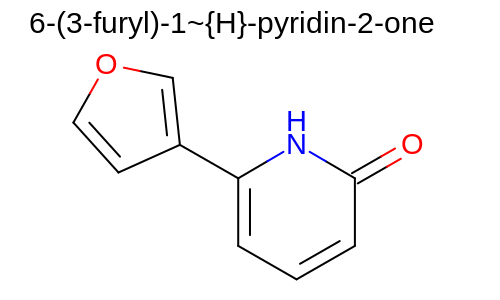

In [7]:
show_oemol_struc(oemol)

-----------------------------------------------------------------------------




# ***use_conformers is defaulted to None in OFFTK

## Adding conformers and doing a new WBO calc, still no change in value

In [48]:
confmol = Molecule.from_mapped_smiles(mapped_smiles)
confmol.generate_conformers(n_conformers=800)
confmol.assign_fractional_bond_orders(use_conformers=confmol.conformers)
bond = confmol.get_bond_between(6, 7)
print(confmol.to_smiles())
print("bond: ", bond)
print("WBO: ", bond.fractional_bond_order)


[H]C1=C(C(=O)N(C(=C1[H])C2=C(OC(=C2[H])[H])[H])[H])[H]
bond:  <Bond atom1 index='6', atom2 index='7'>
WBO:  1.0012589793507196


In [49]:
len(confmol.conformers)

2

In [50]:
import openmoltools
oemol_copy = openmoltools.openeye.generate_conformers(oemol, max_confs=800)
oemol_copy.NumConfs()

2